In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('../data/raw/penguins_lter.csv')

# Select features and target variable
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']
target = 'Body Mass (g)'

# Drop rows with missing values in the selected columns
data = data.dropna(subset=features + [target])

# Prepare the feature matrix (X) and target vector (y)
X = data[features].values
y = data[target].values


In [6]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

# Print the out-of-bag score
print(f"OOB Score: {regressor.oob_score_}")

OOB Score: 0.5004540643552533


In [7]:

# Make predictions
y_pred = regressor.predict(X_test)


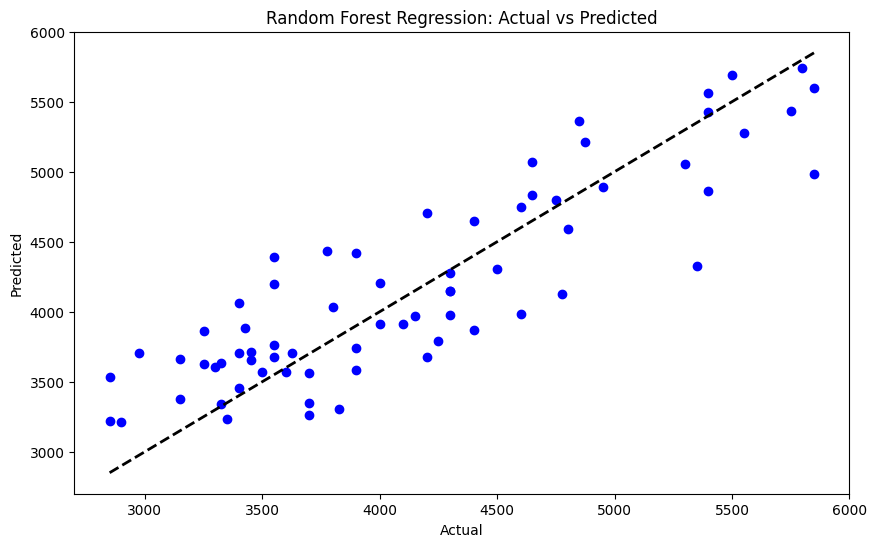

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [8]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

# Display the model's parameters
print(regressor.get_params())

In [9]:
# Calculate accuracy (R^2 score)
accuracy = regressor.score(X_test, y_test)
print(f'R^2 Score: {accuracy}')

R^2 Score: 0.7579382003838044


In [ ]:
# Access the root node of the decision tree
tree_to_plot = regressor.estimators_[0]  # Select the first tree from the Random Forest

# Access the feature and threshold of the root node
root_feature_index = tree_to_plot.tree_.feature[0]  # Index of the feature used for the split
root_threshold = tree_to_plot.tree_.threshold[0]    # Threshold value for the split

# Get the feature name
root_feature_name = features[root_feature_index]

# Separate the data based on the root node's split
true_mask = X[:, root_feature_index] <= root_threshold
false_mask = X[:, root_feature_index] > root_threshold

# Data where the condition is True
X_true = X[true_mask]
y_true = y[true_mask]

# Data where the condition is False
X_false = X[false_mask]
y_false = y[false_mask]

print(f"Root feature: {root_feature_name}")
print(f"Root threshold: {root_threshold}")
print(f"Number of samples where condition is True: {len(X_true)}")
print(f"Number of samples where condition is False: {len(X_false)}")

Root feature: Flipper Length (mm)
Root threshold: 208.5
Number of samples where condition is True: 223
Number of samples where condition is False: 119


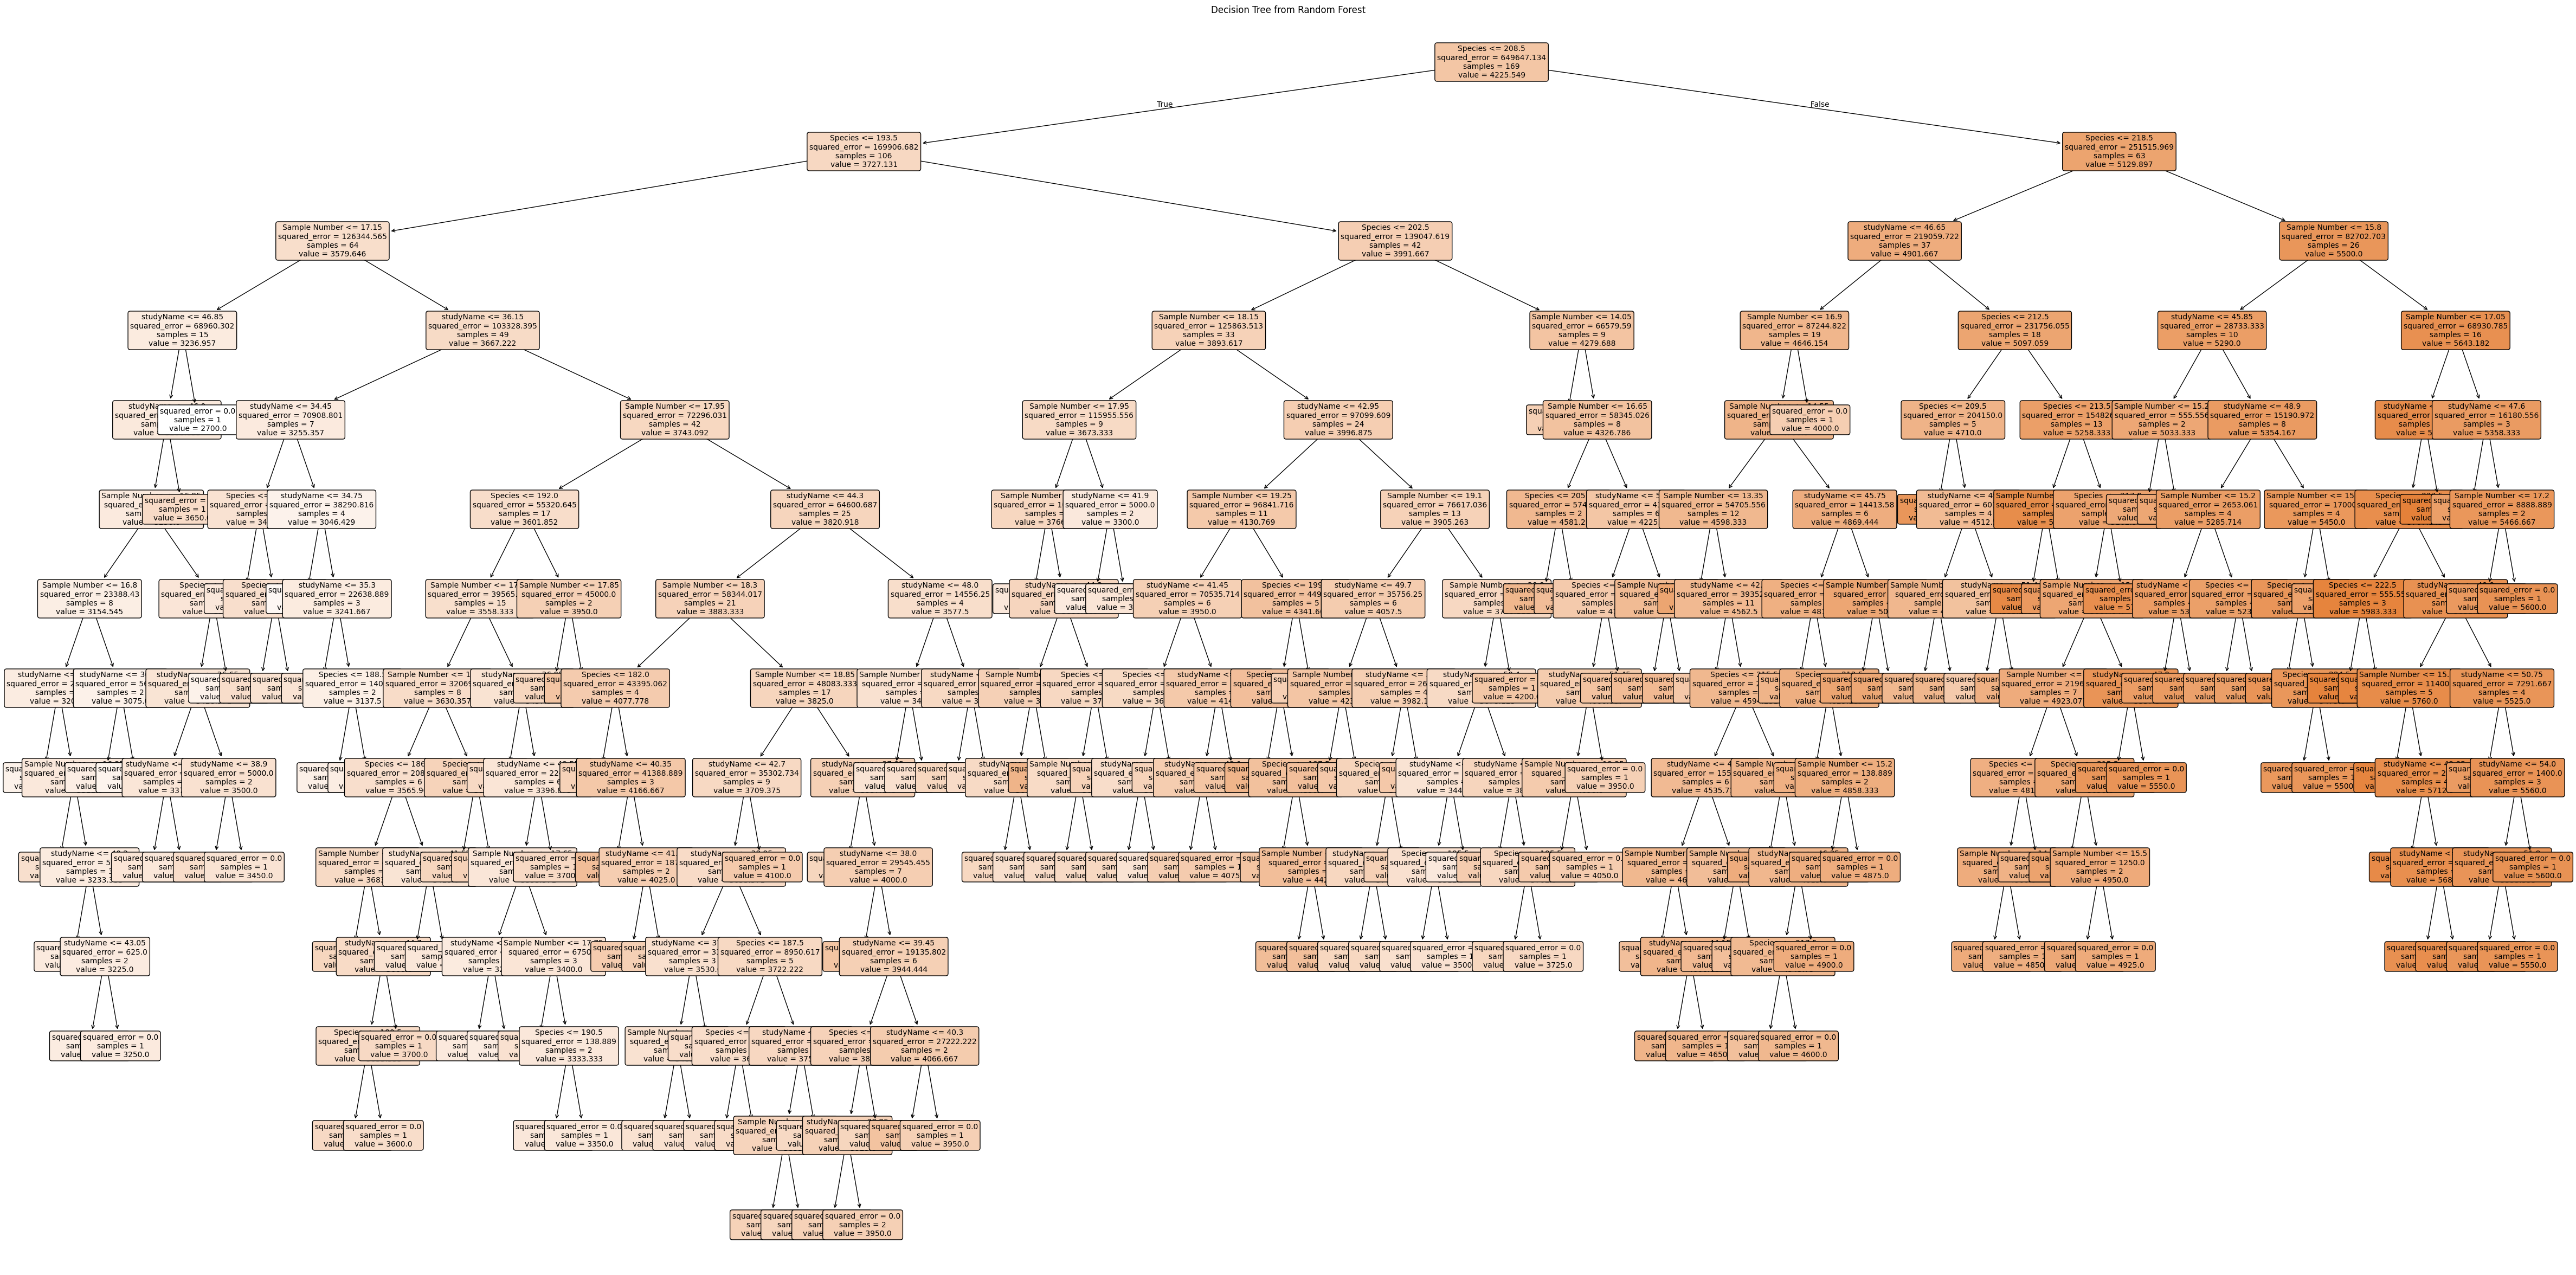

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(60, 30))
plot_tree(tree_to_plot, feature_names=data.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()